In [9]:
import torch
import torch.nn as nn
from hyperparams_and_args import data_dir

from GNN2.train_single_step_CNN_Data import evaluate
from data_handling.data_handler_CNN_data import IndexLoader
from plotting import plot_time_series, heatmap_of_edges
import warnings
warnings.filterwarnings("ignore")  # or use: "once"

In [10]:
model_dir = "models/exp2/"

In [11]:
def eval_model(filepath, device="cuda:0", test_set="GODAS", plot_edges=True):
    filepath = model_dir + filepath
    device = torch.device(device)
    model = torch.load(filepath, map_location=device)
    model.eval()
    model.update_device(device)
    args = model.args

    Data = IndexLoader(args, test_set=test_set, device=device, start_date="1984-01", end_date="2017-12",
                       data_dir=data_dir, transfer=True,  ersstv5_to_cnn_format=True)

    evaluateL2 = nn.MSELoss().to(args.device)
    evaluateL1 = nn.L1Loss().to(args.device)
    test_acc, test_rae, _, oni_test_stats, preds, Ytrue = evaluate(Data, Data.test[0], Data.test[1],
                                                                               model, evaluateL2, evaluateL1, args,
                                                                               return_oni_preds=True)
    print(f"Exp2: {args.horizon} lead months, test on {test_set}",  "stats... OVERALL: rse {:5.4f}"
                    " | ONI:  RMSE {:5.4f} , corr {:5.4f}"
          .format(test_acc, test_rae, oni_test_stats["Corrcoef"]))

    if plot_edges:
        heatmap_of_edges(file_path=filepath, min_weight=1e-4, data_dir=data_dir, region="world")

    # PLot ONI timeseries
    plot_time_series(Ytrue, preds, time_steps=Data.semantic_time_steps, labels=[f"{test_set} ONI", "GNN Forecast"],
                     ylabel=f"{args.index} index",  save_to=None)


Exp2: 1 lead months, test on GODAS stats... OVERALL: rse 0.0521 | ONI:  RMSE 0.2277 , corr 0.9747
# Nonzero Edges: 19761
Exp2: 1 lead months, test on ERSSTv5 stats... OVERALL: rse 0.0146 | ONI:  RMSE 0.1202 , corr 0.9882


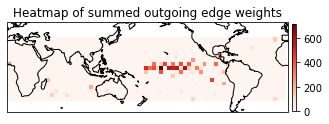

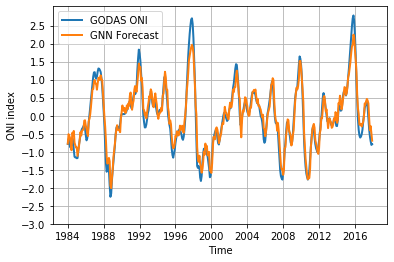

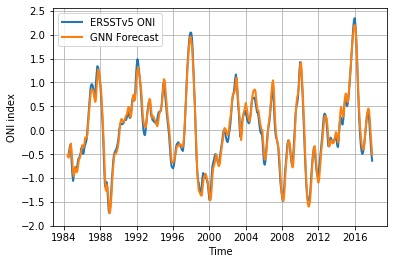

In [12]:
filepath = "1lead_ONI_-40-40lats_0-360lons_3w2L2gcnDepth2dil_32bs0.1d0normed_prelu_50epPRETRAINED_50epTRAIN-CONCAT.pt"
eval_model(filepath, test_set="GODAS")
eval_model(filepath, test_set="ERSSTv5", plot_edges=False)

Exp2: 3 lead months, test on GODAS stats... OVERALL: rse 0.1804 | ONI:  RMSE 0.4237 , corr 0.8908
# Nonzero Edges: 19800
Exp2: 3 lead months, test on ERSSTv5 stats... OVERALL: rse 0.0864 | ONI:  RMSE 0.2900 , corr 0.9273


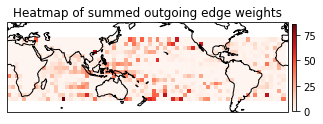

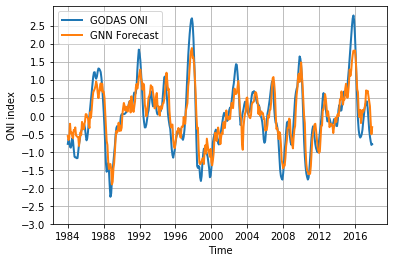

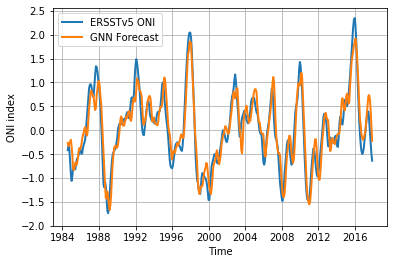

In [13]:
filepath = "3lead_ONI_-40-40lats_0-360lons_3w2L2gcnDepth2dil_32bs0.1d0normed_prelu_75epPRETRAINED_50epTRAIN-CONCAT.pt"
eval_model(filepath, test_set="GODAS")
eval_model(filepath, test_set="ERSSTv5", plot_edges=False)

Exp2: 6 lead months, test on GODAS stats... OVERALL: rse 0.3875 | ONI:  RMSE 0.6200 , corr 0.7420
# Nonzero Edges: 19800
Exp2: 6 lead months, test on ERSSTv5 stats... OVERALL: rse 0.2536 | ONI:  RMSE 0.4923 , corr 0.7755


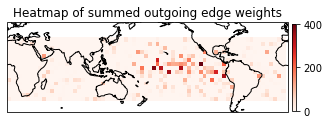

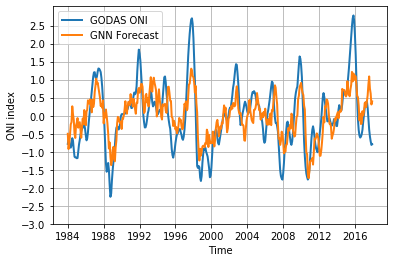

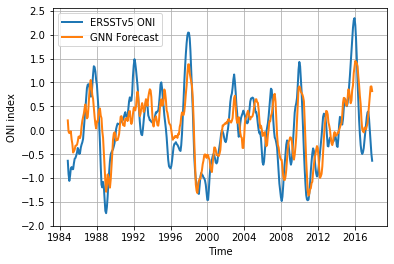

In [14]:
filepath = "6lead_ONI_-40-40lats_0-360lons_3w2L2gcnDepth2dil_32bs0.1d0normed_prelu_100epPRETRAINED_150epTRAIN-CONCAT.pt"
eval_model(filepath, test_set="GODAS")
eval_model(filepath, test_set="ERSSTv5", plot_edges=False)

Exp2: 12 lead months, test on GODAS stats... OVERALL: rse 0.5794 | ONI:  RMSE 0.7605 , corr 0.5547
# Nonzero Edges: 19789
Exp2: 12 lead months, test on ERSSTv5 stats... OVERALL: rse 0.4173 | ONI:  RMSE 0.6510 , corr 0.5539


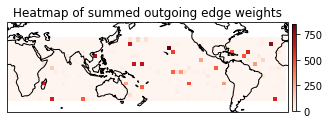

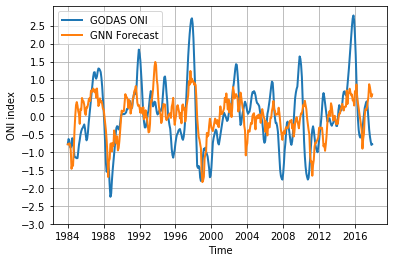

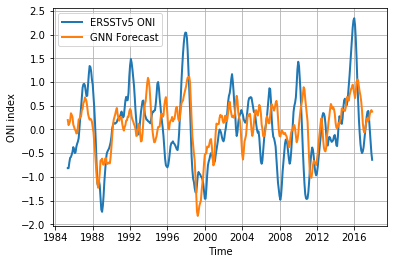

In [15]:
filepath = "12lead_ONI_-40-40lats_0-360lons_3w3L2gcnDepth2dil_32bs0.1d0normed_prelu_100epPRETRAINED_150epTRAIN-CONCAT.pt"
eval_model(filepath, test_set="GODAS")
eval_model(filepath, test_set="ERSSTv5", plot_edges=False)